<a href="https://www.kaggle.com/code/vedantshinde06/13-complete-case-analysis?scriptVersionId=223608869" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-data/data_science_job.csv


In [2]:
df = pd.read_csv('/kaggle/input/jobs-data/data_science_job.csv')

In [3]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
678,10554,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,1000-4999,Pvt Ltd,22.0,0.0
1203,15818,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,<10,Early Stage Startup,82.0,0.0
18018,15504,city_136,0.897,NaN,Has relevent experience,no_enrollment,Masters,STEM,6.0,10/49,Pvt Ltd,70.0,0.0
14079,30561,city_21,0.624,Male,Has relevent experience,no_enrollment,Graduate,STEM,4.0,<10,Early Stage Startup,62.0,1.0
12311,18150,city_97,0.925,Male,Has relevent experience,no_enrollment,Primary School,NaN,6.0,NaN,NaN,28.0,0.0


# Precentage of missing data in each row

In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
df.shape

(19158, 13)

In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,city_development_index,enrolled_university,education_level,experience,training_hours
7911,NaN,no_enrollment,Phd,20.0,31.0
1105,0.920,no_enrollment,Graduate,14.0,188.0
5689,0.926,no_enrollment,Graduate,11.0,17.0
8091,0.926,no_enrollment,NaN,20.0,154.0
727,0.855,Full time course,Graduate,3.0,17.0


In [8]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

Therefore 89% rows in the data have all the values

In [9]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

# Checking the distribution of data before and after the CCA

In [10]:
import matplotlib.pyplot as plt

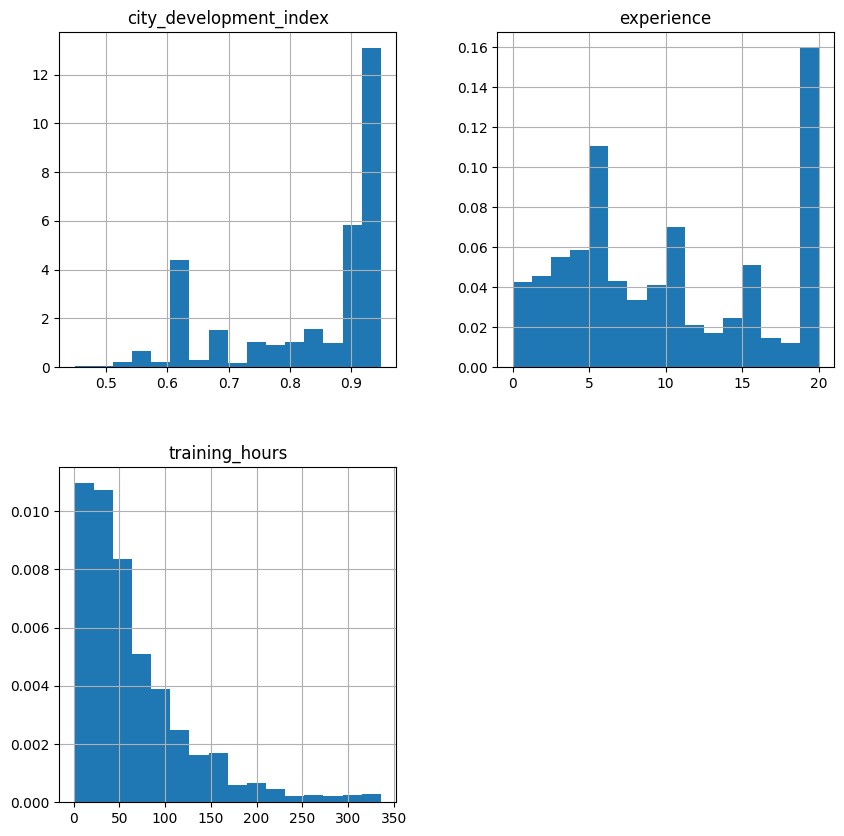

In [11]:
new_df.hist(bins=16,density=True,figsize=(10,10))
plt.show()

<Axes: >

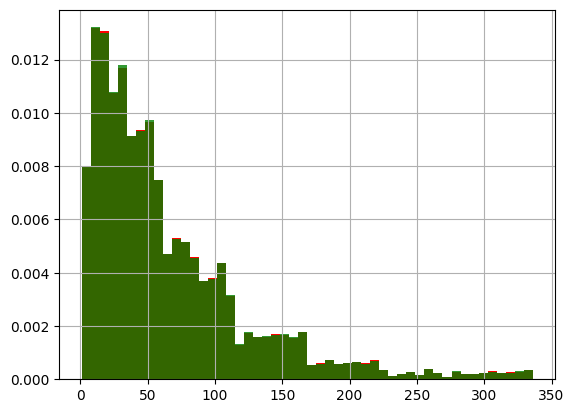

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data

df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

#data after CCA
# the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions

new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)


<Axes: ylabel='Density'>

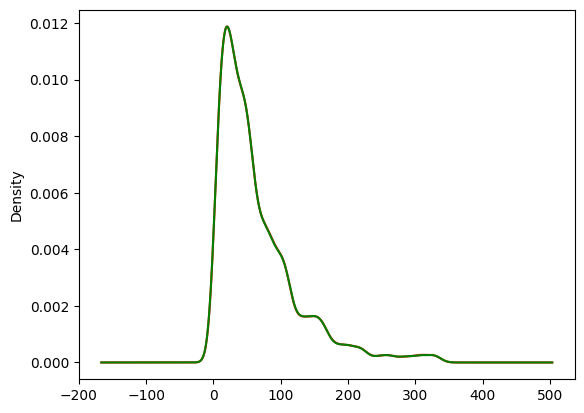

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

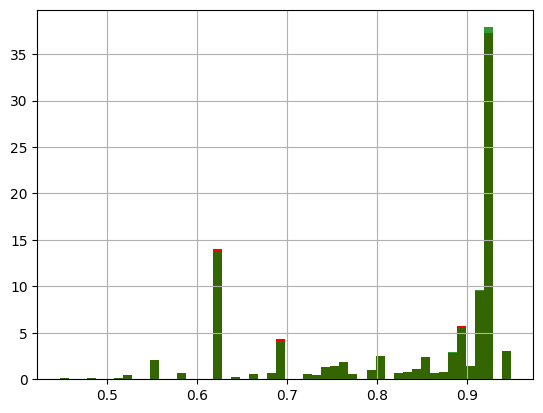

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

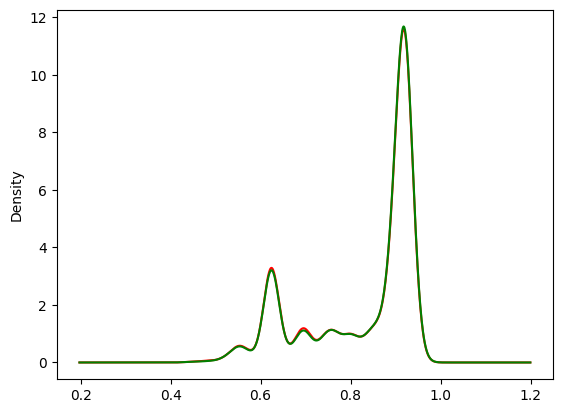

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

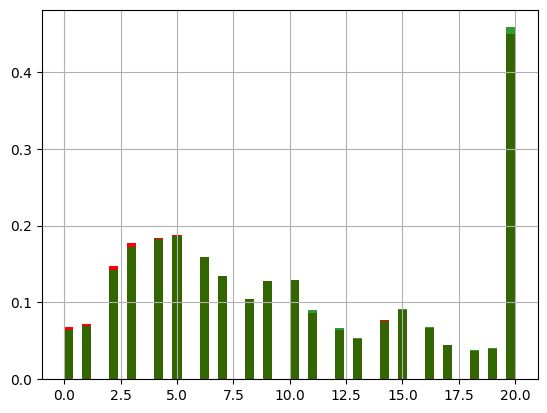

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

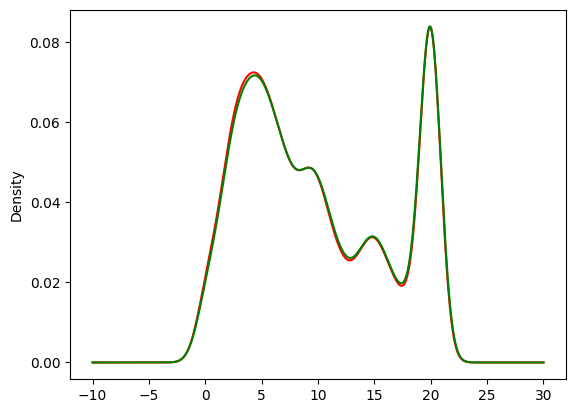

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [18]:
temp = pd.concat([

    #percentage of observations per category, original data
    df['enrolled_university'].value_counts() / len(df),

    #percentage of observations per category, CCA data
    new_df['enrolled_university'].value_counts() / len(new_df)
    
],axis=1)

temp.columns = ['Original', 'CCA']
temp

,Original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [19]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
